In [19]:
# pip install scikit-learn

In [20]:
# pip install seaborn

In [21]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.spatial import ConvexHull, Delaunay
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [22]:
# import Analysis_Without_IP
# from Analysis_Without_IP import *

## PCA Function

In [23]:
def plot_pca(file_path, title):
    embeddings = pd.read_csv(file_path, sep='\t', header=None)

    col_names = ['file_path'] + [f"dim_{i}" for i in range(1, embeddings.shape[1])]
    embeddings.columns = col_names

    embeddings['category'] = embeddings['file_path'].apply(lambda x: x.split('/')[-2])

    file_paths = embeddings.iloc[:, 0]

    X = embeddings.drop['file_path', 'category']

    pca = PCA(n_components=3)
    X_3d = pca.fit_transform(X)

    # Plotting
    categories = embeddings['category'].values
    unique_cats = sorted(embeddings['category'].unique())

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    palette = sns.color_palette("hls", len(unique_cats))

    for i, cat in enumerate(unique_cats):
        idx = (categories == cat)
        if np.sum(idx) < 4:
            # Need at least 4 points in 3D for a 3D hull
            continue
        points_3d = X_3d[idx]
        
        hull = ConvexHull(points_3d)
        # Plot each triangular simplex
        for simplex in hull.simplices:
            tri = Poly3DCollection([points_3d[simplex]], alpha=0.2)
            tri.set_facecolor(palette[i])
            tri.set_edgecolor('none')
            ax.add_collection3d(tri)

        # plot data points
        ax.scatter(points_3d[:,0], points_3d[:,1], points_3d[:,2],
                color=palette[i], alpha=0.7, s=10)
        
        ax.scatter(
        points_3d[:,0], 
        points_3d[:,1], 
        points_3d[:,2],
        color=palette[i], 
        alpha=0.7, 
        s=10,
        label=cat  
    )

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("PC1", fontsize=12, labelpad=10)
    ax.set_ylabel("PC2", fontsize=12, labelpad=10)
    ax.set_zlabel("PC3", fontsize=12, labelpad=10)

    legend = ax.legend(title="Category", loc='upper left')
    legend.set_title("Categories", prop={'size': 14})  

    plt.show()

In [24]:
def parse_category(path):
    filename = os.path.basename(path)            
    category = filename.split('/')[-1].split('_')[0]              
    return category.lower().strip()

## Flowers 10

In [25]:
def flowers_plot_pca(embeddings, title):
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    from scipy.spatial import ConvexHull
    from sklearn.decomposition import PCA
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Rename columns
    col_names = ['file_path'] + [f"dim_{i}" for i in range(1, embeddings.shape[1])]
    embeddings.columns = col_names

    # Parse category from file path (assumes parse_category is defined elsewhere)
    embeddings['category'] = embeddings['file_path'].apply(parse_category)

    # Drop non-embedding columns to get X
    X = embeddings.drop(['file_path', 'category'], axis=1).values

    # PCA (3D)
    pca = PCA(n_components=3)
    X_3d = pca.fit_transform(X)

    # Prepare for plotting
    categories = embeddings['category'].values
    unique_cats = sorted(embeddings['category'].unique())

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    palette = sns.color_palette("hls", len(unique_cats))

    # Plot convex hull + scatter points per category
    for i, cat in enumerate(unique_cats):
        idx = (categories == cat)
        # Need at least 4 points for a 3D hull
        if np.sum(idx) < 4:
            continue
        points_3d = X_3d[idx]

        hull = ConvexHull(points_3d)
        for simplex in hull.simplices:
            tri = Poly3DCollection([points_3d[simplex]], alpha=0.2)
            tri.set_facecolor(palette[i])
            tri.set_edgecolor('none')
            ax.add_collection3d(tri)

        # Plot data points (with legend label)
        ax.scatter(
            points_3d[:, 0],
            points_3d[:, 1],
            points_3d[:, 2],
            color=palette[i],
            alpha=0.7,
            s=10,
            label=cat
        )

    # Cosmetic settings
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("PC1", fontsize=12, labelpad=10)
    ax.set_ylabel("PC2", fontsize=12, labelpad=10)
    ax.set_zlabel("PC3", fontsize=12, labelpad=10)

    legend = ax.legend(title="Category", loc='upper left')
    legend.set_title("Categories", prop={'size': 14})

    plt.show()


In [55]:
fl10embeddings = pd.read_csv('WithoutIP/flowers10/fl10embeddings.tsv', sep='\t', header=None)
fl10pred = pd.read_csv('WithoutIP/flowers10/f10.csv', header=None).drop(index=fl10pred.index[0])

# fl10merged = fl10pred.merge(fl10pred, left_on=0, right_on='file')

fl10pred




# flowers_plot_pca(fl10embeddings, "Flowers 10 (Base) PCA")

,0,1
0,file,label
2,flowers10Images/flowers/lilies_00055.jpg,lilies
3,flowers10Images/flowers/hydrangeas_00064.jpg,hydrangeas
4,flowers10Images/flowers/tulip_00023.jpg,tulip
5,flowers10Images/flowers/lilies_00077.jpg,lilies
...,...,...
729,flowers10Images/flowers/peonies_00009.jpg,peonies
730,flowers10Images/flowers/peonies_00075.jpg,peonies
731,flowers10Images/flowers/daisies_00017.jpg,daisies
732,flowers10Images/flowers/peonies_00005.jpg,garden_roses


In [56]:
fl10embeddings

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,/tmp/tmpca4dggml/flowers/gardenias_00086.jpg,-0.017738,0.061784,0.002637,0.011319,-0.015680,-0.013492,0.014670,0.012056,0.035882,...,0.002261,0.050834,0.090228,-0.034984,-0.010546,-0.002135,0.020245,0.050456,0.027064,-0.031650
1,/tmp/tmpca4dggml/flowers/lilies_00055.jpg,0.013260,0.053775,-0.001510,0.014967,-0.084119,-0.008511,0.025113,0.011894,0.055445,...,-0.030951,0.021397,0.063756,-0.027171,-0.013333,0.020065,0.021577,0.049569,0.028101,-0.001485
2,/tmp/tmpca4dggml/flowers/hydrangeas_00064.jpg,-0.021516,0.024289,-0.032863,0.015489,-0.064847,-0.008009,0.026160,-0.000425,0.063291,...,0.001556,0.007975,0.075771,-0.020566,0.014199,0.010846,-0.017339,0.059425,-0.015140,-0.009084
3,/tmp/tmpca4dggml/flowers/tulip_00023.jpg,-0.032057,0.031914,-0.002598,-0.021913,-0.026381,0.022567,0.025274,0.013514,0.019600,...,-0.024259,0.040752,0.084172,0.009087,-0.006983,0.036638,-0.018295,0.058299,0.044508,-0.001799
4,/tmp/tmpca4dggml/flowers/lilies_00077.jpg,-0.006770,0.034015,-0.011348,-0.011667,-0.042895,0.003814,0.016788,0.020023,0.044914,...,-0.026492,0.010490,0.072166,-0.012276,-0.037630,0.039960,0.024232,0.047411,0.008745,-0.007951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,/tmp/tmpca4dggml/flowers/peonies_00009.jpg,-0.041639,0.034576,-0.026632,-0.009246,-0.050670,0.010043,0.040401,0.001430,0.008104,...,-0.023855,0.014075,0.124484,0.003724,-0.003988,0.020149,-0.007104,0.055266,0.025574,-0.010209
729,/tmp/tmpca4dggml/flowers/peonies_00075.jpg,-0.036897,0.031912,-0.024688,-0.001921,-0.021057,0.009740,0.030901,0.006865,0.042796,...,-0.001759,-0.004975,0.078716,0.006894,-0.005858,0.001066,-0.006039,0.040980,0.003779,-0.023851
730,/tmp/tmpca4dggml/flowers/daisies_00017.jpg,-0.025024,0.004410,-0.005552,-0.001290,-0.061210,0.006697,0.025138,0.004848,0.031917,...,-0.011946,0.011469,0.102335,-0.000348,0.009122,0.042701,0.017790,0.045264,0.009271,-0.009779
731,/tmp/tmpca4dggml/flowers/peonies_00005.jpg,-0.017761,0.034136,-0.017134,-0.051950,-0.025504,0.024306,0.032133,0.004758,0.065833,...,-0.002218,0.005510,0.071775,-0.021855,-0.000806,0.019721,0.011177,0.051442,0.028492,-0.026416


In [42]:
# fl10pred.head()

In [40]:
fl10embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,/tmp/tmpca4dggml/flowers/gardenias_00086.jpg,-0.017738,0.061784,0.002637,0.011319,-0.015680,-0.013492,0.014670,0.012056,0.035882,...,0.002261,0.050834,0.090228,-0.034984,-0.010546,-0.002135,0.020245,0.050456,0.027064,-0.031650
1,/tmp/tmpca4dggml/flowers/lilies_00055.jpg,0.013260,0.053775,-0.001510,0.014967,-0.084119,-0.008511,0.025113,0.011894,0.055445,...,-0.030951,0.021397,0.063756,-0.027171,-0.013333,0.020065,0.021577,0.049569,0.028101,-0.001485
2,/tmp/tmpca4dggml/flowers/hydrangeas_00064.jpg,-0.021516,0.024289,-0.032863,0.015489,-0.064847,-0.008009,0.026160,-0.000425,0.063291,...,0.001556,0.007975,0.075771,-0.020566,0.014199,0.010846,-0.017339,0.059425,-0.015140,-0.009084
3,/tmp/tmpca4dggml/flowers/tulip_00023.jpg,-0.032057,0.031914,-0.002598,-0.021913,-0.026381,0.022567,0.025274,0.013514,0.019600,...,-0.024259,0.040752,0.084172,0.009087,-0.006983,0.036638,-0.018295,0.058299,0.044508,-0.001799
4,/tmp/tmpca4dggml/flowers/lilies_00077.jpg,-0.006770,0.034015,-0.011348,-0.011667,-0.042895,0.003814,0.016788,0.020023,0.044914,...,-0.026492,0.010490,0.072166,-0.012276,-0.037630,0.039960,0.024232,0.047411,0.008745,-0.007951


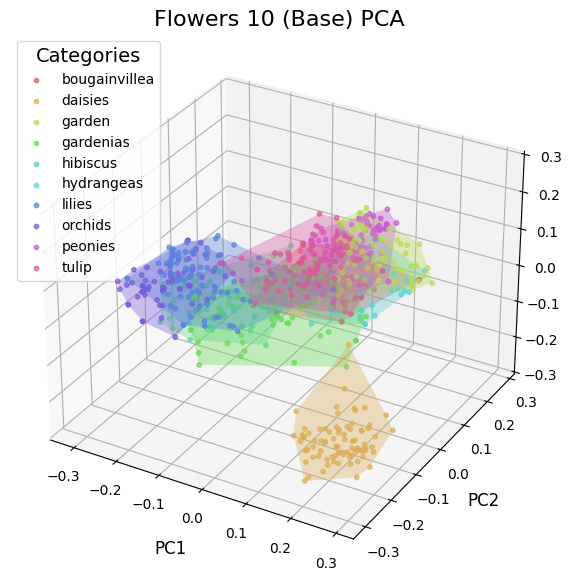

In [31]:
fl140embeddings = pd.read_csv('WithoutIP/flowers10/fl140embeddings.csv', header=None)
flowers_plot_pca(fl140embeddings, "Flowers 10 (Base) PCA")